In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from qdots_qll.models import game


In [2]:
model = game.physical_model()
true_pars = game.true_pars

In [3]:
times = jnp.linspace(0, 100, 1000)

In [4]:
model.fim(true_pars, times[3])

Array([[ 0.00387251,  0.00187493, -0.00112247,  0.00076165],
       [ 0.00187493,  0.00403836, -0.00169155,  0.00100559],
       [-0.00112247, -0.00169155,  0.00660416, -0.00128189],
       [ 0.00076165,  0.00100559, -0.00128189,  0.00354822]],      dtype=float32)

In [5]:
det_fim_times = vmap(lambda a: jnp.linalg.det(model.fim(true_pars, a)), in_axes=(0))(times)

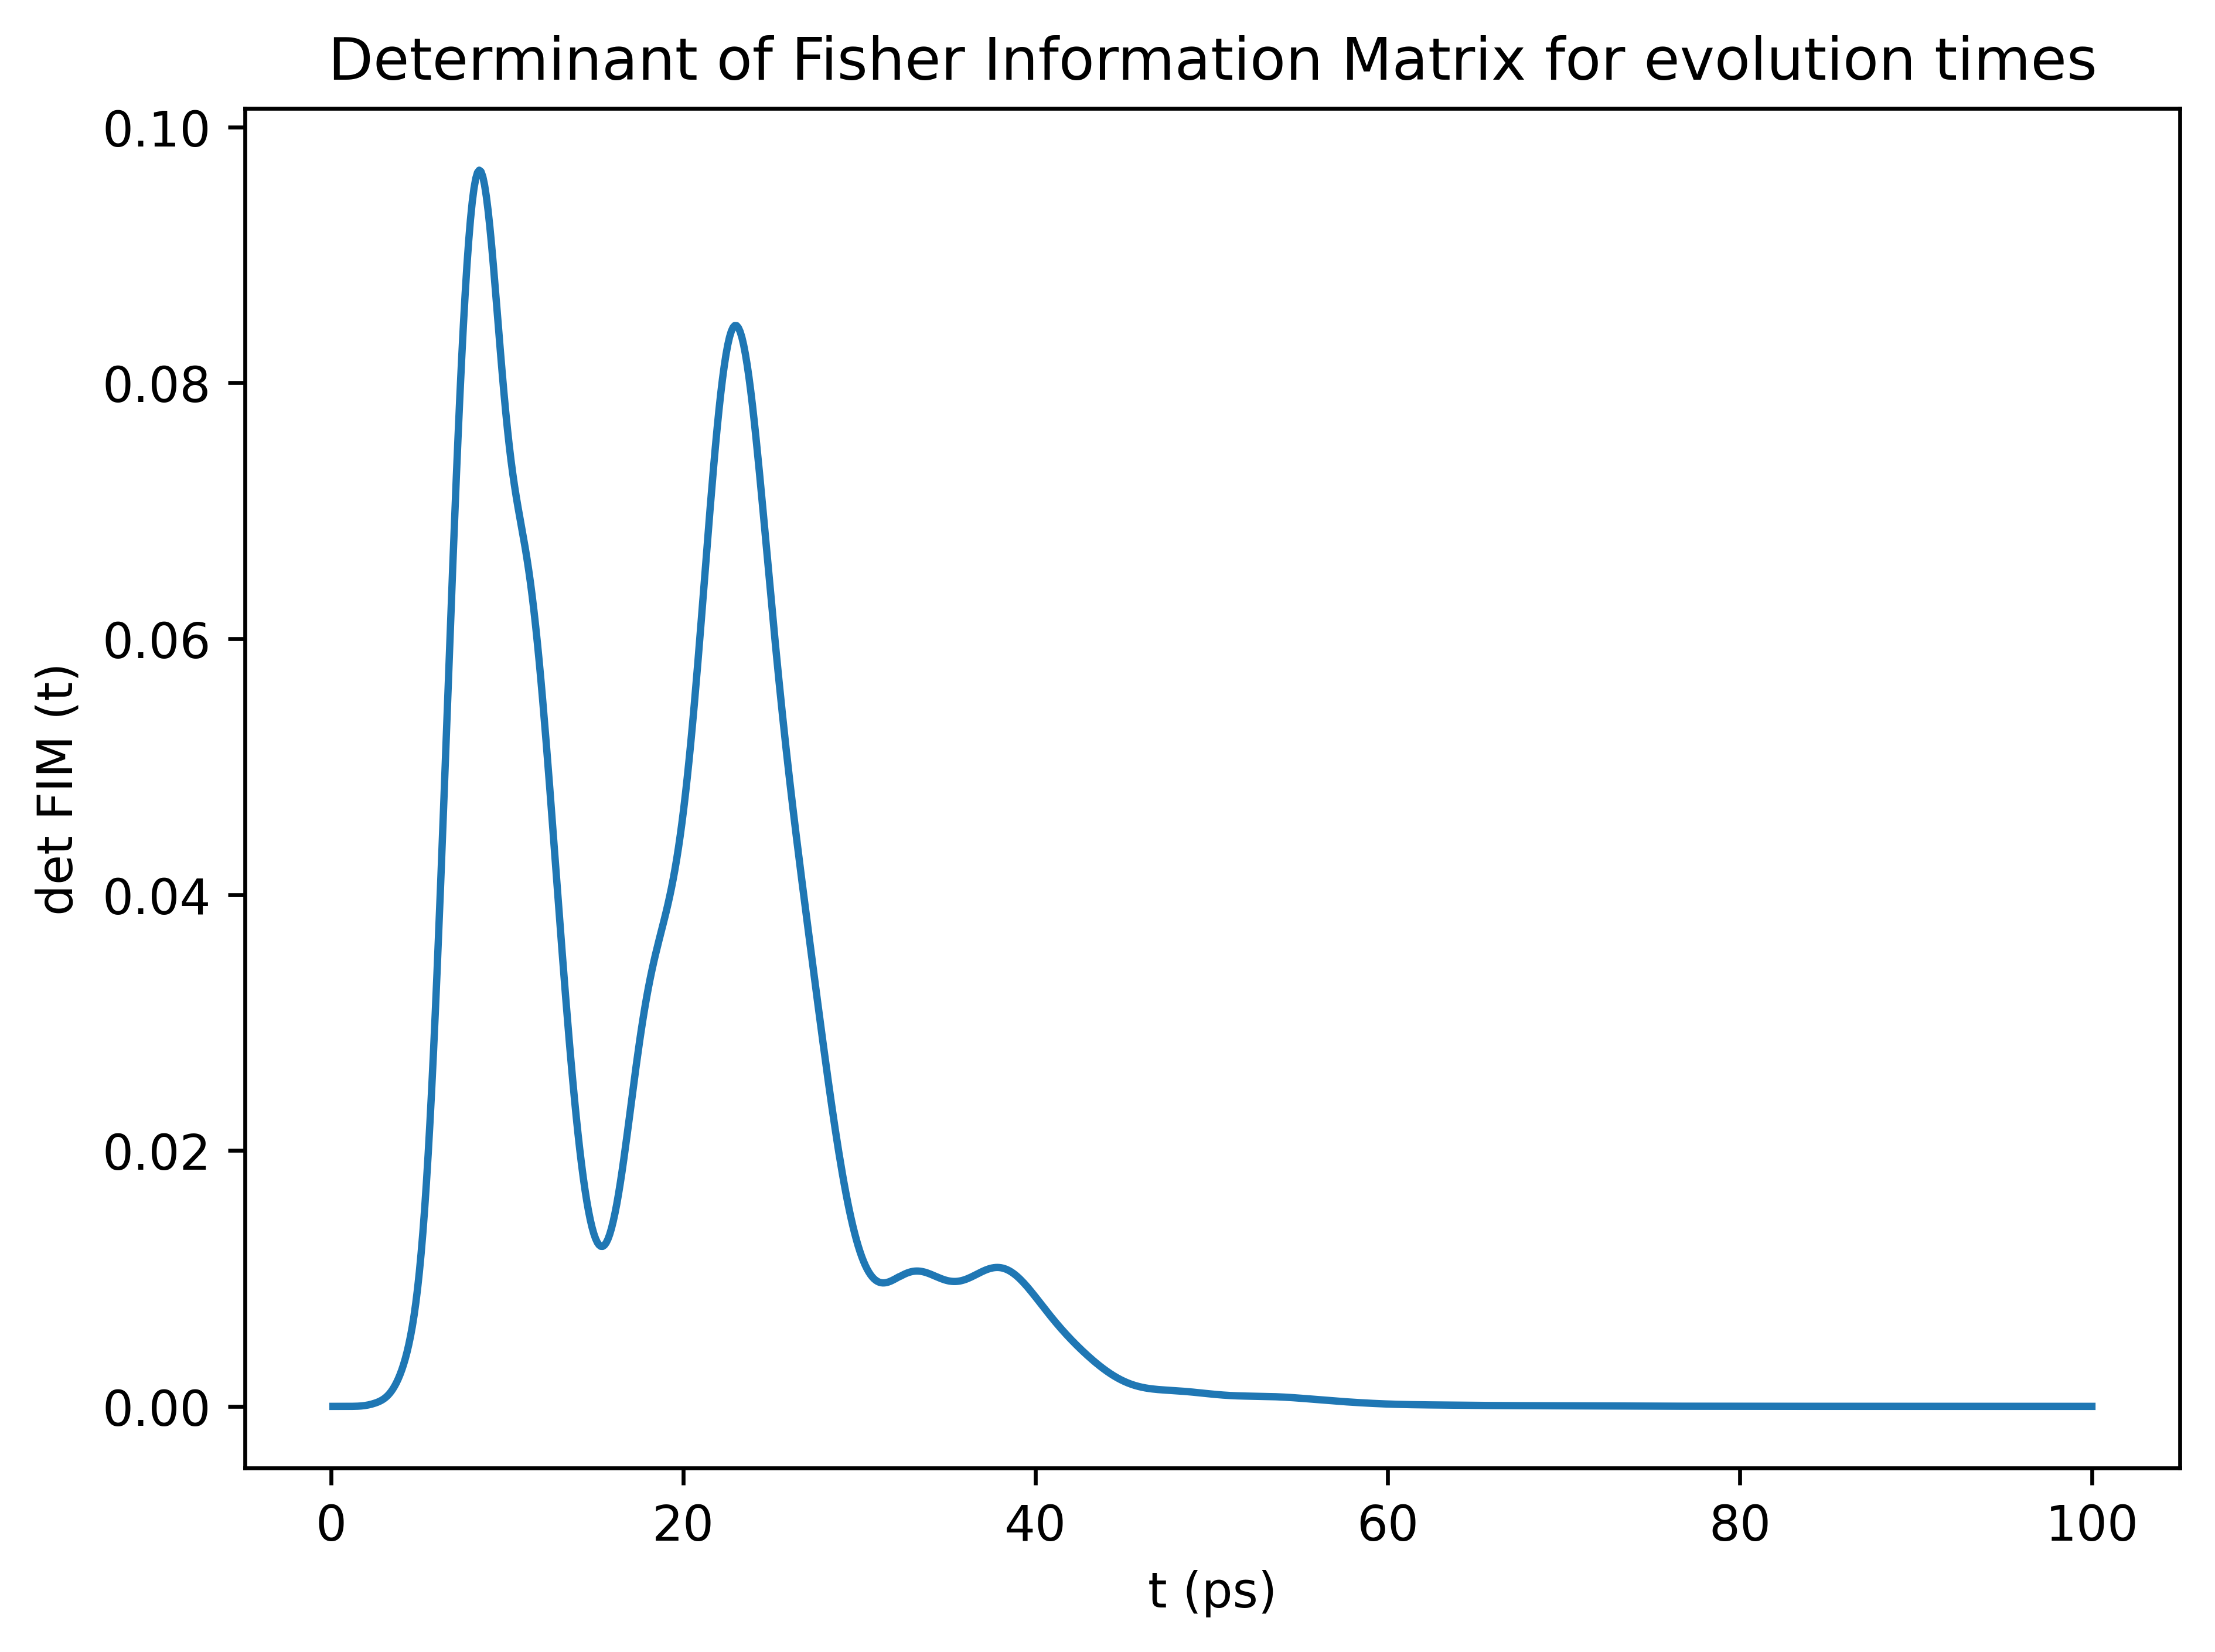

In [6]:
import matplotlib




plt.figure(dpi=600)
plt.plot(times, det_fim_times)
plt.xlabel("t (ps)")
plt.ylabel("det FIM (t)")
plt.title("Determinant of Fisher Information Matrix for evolution times")
plt.tight_layout()

plt.savefig("example.pdf")
plt.show()